In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
print(os.listdir("/Users/ravinitchand/Desktop/DSProject/chest_xray"))

['PythonCode', '.DS_Store', 'test', 'train', 'val']


In [131]:
#show different folders
mainDIR = os.listdir('/Users/ravinitchand/Desktop/DSProject/chest_xray')
print(mainDIR)
train_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/train/'
val_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/val/'
test_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/test/'

['PythonCode', '.DS_Store', 'test', 'train', 'val']


In [132]:
## Identifying the NORMAL AND PNEUMONIA sets in the train folder
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [133]:
## Finding a random picture from the normal folder
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

1342
normal picture title:  IM-0689-0001.jpeg


In [134]:
## Finding a random picture from the Pneumonia Folder
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

pneumonia picture title: person1139_virus_1882.jpeg


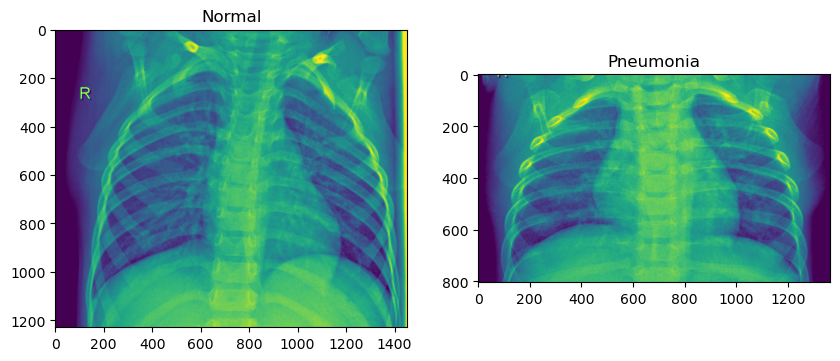

In [135]:
## Loading the random images into Python and plotting them
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

plt.show()

In [136]:
from keras.layers import BatchNormalization

## Creating the convolutional neural net model
cnn = Sequential()

## Adding a convolutional layer to the model
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

## Adding a pooling layer to the model
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## Adding another convolutional layer to the model
cnn.add(Conv2D(32, (3, 3), activation="relu"))

#NEW Adding Batch Normalization (Ensures that the neural network's learning process is smooth and effective) 
#Adjusts pixel so that they have similar scales and distribtions
cnn.add(BatchNormalization())

## Adding another pooling layer to the model
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## "Flatten" the output into one dimension
cnn.add(Flatten())

##NEW Adding fully connected layers
cnn.add(Dense(units=128, activation='relu'))  # First fully connected layer
cnn.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification (e.g., healthy

In [137]:
## Add dense layers for the non-linear relationships and sigmoid for binary classification
cnn.add(Dense(units=128, activation='relu'))  # First fully connected layer
cnn.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

## Compile the neural network using the "Adam" optimizer
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Set the number of samples as well as the batch size
num_of_test_samples = 600
batch_size = 32

## Data generation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [138]:
test_datagen = ImageDataGenerator(rescale = 1./255) ## Scales the image to the appropriate dimensions

training_set = train_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

## Same as above on the test and validation data sets
validation_generator = test_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [139]:
## Summary of the CNN and model fitting
cnn.summary()

cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,730 (3.10 MB)

 Trainable params: 813,666 (3.10 MB)

 Non-trainable params: 64 (256.00 B)

163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 457ms/step - accuracy: 0.7296 - loss: 0.5612 - val_accuracy: 0.5000 - val_loss: 0.7092


2024-05-25 12:22:45.006934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [140]:
## Model Accuracy metrics
test_accu = cnn.evaluate(test_set,steps=624)
print(f'The testing accuracy is: {test_accu[1] * 100:.2f}%')

## Predictions
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6244 - loss: 0.6645    
The testing accuracy is: 62.50%


2024-05-25 12:23:03.036632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step


In [ ]:
## Try a second model as well
# Experiment with different base models/layers also
# Do experimenting with customized layers to the model
# Tune the hyperparameters

In [ ]:
#Adding Layers
#Multiple models
#"VGG16"
#Hyperparameter
#